In [11]:
import pandas as pd
import matplotlib.pyplot as plt

## Helpers 

In [34]:
def print_statistics(df):
    """Print comprehensive statistics for a payouts dataframe."""
    # Payoff value USD statistics
    payoff_stats = {
        'max': df['payoff_value_usd'].max(),
        'min': df['payoff_value_usd'].min(),
        'average': df['payoff_value_usd'].mean(),
        'median': df['payoff_value_usd'].median(),
        'std_dev': df['payoff_value_usd'].std(),
        'sum': df['payoff_value_usd'].sum()
    }
    
    print("Payoff Value USD Statistics:")
    print(f"Max: ${payoff_stats['max']:,.2f}")
    print(f"Min: ${payoff_stats['min']:,.2f}")
    print(f"Average: ${payoff_stats['average']:,.2f}")
    print(f"Median: ${payoff_stats['median']:,.2f}")
    print(f"Standard Deviation: ${payoff_stats['std_dev']:,.2f}")
    print(f"Sum: ${payoff_stats['sum']:,.2f}")
    
    # Row and unique victim address counts
    total_rows = len(df)
    unique_victims = df['victim_address'].nunique()
    
    print(f"\nTotal number of rows: {total_rows}")
    print(f"Number of unique victim addresses: {unique_victims}")

def average_attack_attempts(df):
    """Calculate and print the mean and median number of attacks in the attack_attempts column.
    
    The attack_attempts column is stored as a string representation of an array.
    This function parses each entry and calculates the mean and median count.
    """
    import ast
    
    def count_attempts(attempts_str):
        """Parse the string representation of an array and return its length."""
        try:
            # Parse the string as a Python literal (list)
            attempts_list = ast.literal_eval(attempts_str)
            return len(attempts_list) if isinstance(attempts_list, list) else 0
        except (ValueError, SyntaxError):
            # Handle edge cases where parsing might fail
            return 0
    
    # Apply the count function to each row
    attempt_counts = df['attack_attempts'].apply(count_attempts)
    
    # Calculate mean and median
    mean_attempts = attempt_counts.mean()
    median_attempts = attempt_counts.median()
    
    # Print the statistics
    print(f"Average number of attack attempts: {mean_attempts:.2f}")
    print(f"Median number of attack attempts: {median_attempts:.2f}")
    
    return mean_attempts

# Arbitrum Analysis

      month  Count
0   2024-03      1
1   2024-04     12
2   2024-05     22
3   2024-06     15
4   2024-07     10
5   2024-08     10
6   2024-09     18
7   2024-10      6
8   2024-11     12
9   2024-12     14
10  2025-01     14
11  2025-02      7
12  2025-03      8
13  2025-04     11
14  2025-05     22
15  2025-06     12
16  2025-07     33


/var/folders/1p/z01wly996kqgbn5g072fv5pw0000gn/T/ipykernel_5086/1883185413.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['payoff_ts'].dt.to_period('M')


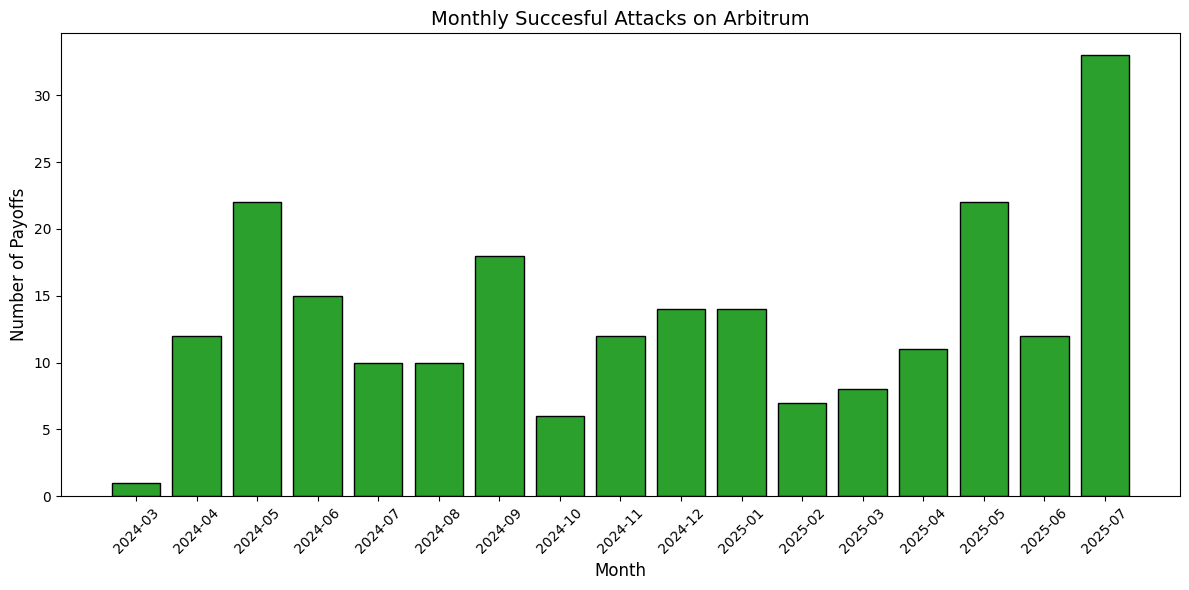

In [15]:
# 1. Configuration
arb_file_path = '/Users/vlad/Downloads/GitHub/ethereum-poisoning-detector/data/arbitrum_payouts.csv'

# 2. Load the Data
df = pd.read_csv(arb_file_path)

# 3. Process the Timestamp
# Converts the string timestamp to a datetime object
df['payoff_ts'] = pd.to_datetime(df['payoff_ts'])

# Create a "Month" period column (e.g., "2024-07")
df['month'] = df['payoff_ts'].dt.to_period('M')

# 4. Group by Month and Count
monthly_counts = df.groupby('month').size().reset_index(name='Count')

# Convert Period object to String for cleaner plotting
monthly_counts['month'] = monthly_counts['month'].astype(str)

# Ensure it's sorted chronologically
monthly_counts = monthly_counts.sort_values('month')

# Display the Table
print(monthly_counts)

# 5. Plot the Bar Graph
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts['month'], monthly_counts['Count'], color='#2ca02c', edgecolor='black')

plt.title('Monthly Succesful Attacks on Arbitrum', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Payoffs', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Arbitrum attack success metrics

In [16]:
arb_payouts_df = pd.read_csv(arb_file_path)
arb_payouts_df.head()

,payoff_tx_hash,payoff_ts,token_symbol,victim_address,attack_type,attack_tx_hash,attack_attempts,payoff_value_usd,hours_until_payoff,arbiscan_link
0,0x1ab2175921dabea3dfce8ef7345067a601e159baeacb...,2025-01-18 04:23:44.000000 UTC,USDC.e,0x6025fe11a83f46eb3466efb6f40eba1cb1194819,tiny_transfer,0xa3136a977b86c8e4bfb33c8aaea917d5d8c3b73fea2c...,[0xa3136a977b86c8e4bfb33c8aaea917d5d8c3b73fea2...,313288.284297,414,https://arbiscan.io/tx/0x1ab2175921dabea3dfce8...
1,0x54e6368ff2490b36616e398261bd6733ffaa53bfe15c...,2024-08-15 14:59:23.000000 UTC,USDC.e,0xeda8288acb0346017323f7f2338221f3d6416b64,zero_value,0xcc1878cccedad42a223a03f8c5e13cd5c41e02d2bee5...,[0xa2c021857a14d3aadb9642ce58a599dea0f13fd23c5...,300000.006000,310,https://arbiscan.io/tx/0x54e6368ff2490b36616e3...
2,0x52a92ffab9f9055ad9077e48cc1c8990d5bb2daaf3e1...,2024-12-13 11:01:51.000000 UTC,USDC.e,0x3cc830a5bc34f75a2c759c624637805b668bc695,zero_value,0xe265eef459dc28adbd68cf02b29308d5a72e90bb5580...,[0xbf84b3694d265962fffb8974ebe5cbc5fcac592dc30...,69989.857898,1,https://arbiscan.io/tx/0x52a92ffab9f9055ad9077...
3,0x94f8bee120873c0b31bfbd2d5958a6b0c718c6df0963...,2025-05-09 07:14:52.000000 UTC,USDC.e,0x56dad75f00b12066fb2bfb3178325d9ef619615d,zero_value,0xe6033e46b951f6e17fae46b5c5584542dab70a31c763...,[0x205c68c742edba567275670acae44527a961096727d...,50020.218200,101,https://arbiscan.io/tx/0x94f8bee120873c0b31bfb...
4,0x5f2016bcb6ff072a79a0695cb31e0b0d53765d8811c5...,2024-12-04 16:11:22.000000 UTC,USDC.e,0x73ec4dcb8b04a621506a1825bbcab3975247a47e,zero_value,0x90594441d7b37847e456611e87f0aeb9658ace510aef...,[0x90594441d7b37847e456611e87f0aeb9658ace510ae...,32807.261510,13,https://arbiscan.io/tx/0x5f2016bcb6ff072a79a06...


In [35]:
# Call the function with arbitrum payouts
print_statistics(arb_payouts_df)
average_attack_attempts(arb_payouts_df)


Payoff Value USD Statistics:
Max: $313,288.28
Min: $10.05
Average: $4,774.23
Median: $232.00
Standard Deviation: $29,365.61
Sum: $1,083,751.34

Total number of rows: 227
Number of unique victim addresses: 181
Average number of attack attempts: 4.26
Median number of attack attempts: 2.00


np.float64(4.255506607929515)

      month  Count
0   2024-07     20
1   2024-08     28
2   2024-09     28
3   2024-10      7
4   2024-11     13
5   2024-12      1
6   2025-01      7
7   2025-02     10
8   2025-03     56
9   2025-04     51
10  2025-05     57
11  2025-06     45
12  2025-07     23


/var/folders/1p/z01wly996kqgbn5g072fv5pw0000gn/T/ipykernel_5086/2022436633.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['payoff_ts'].dt.to_period('M')


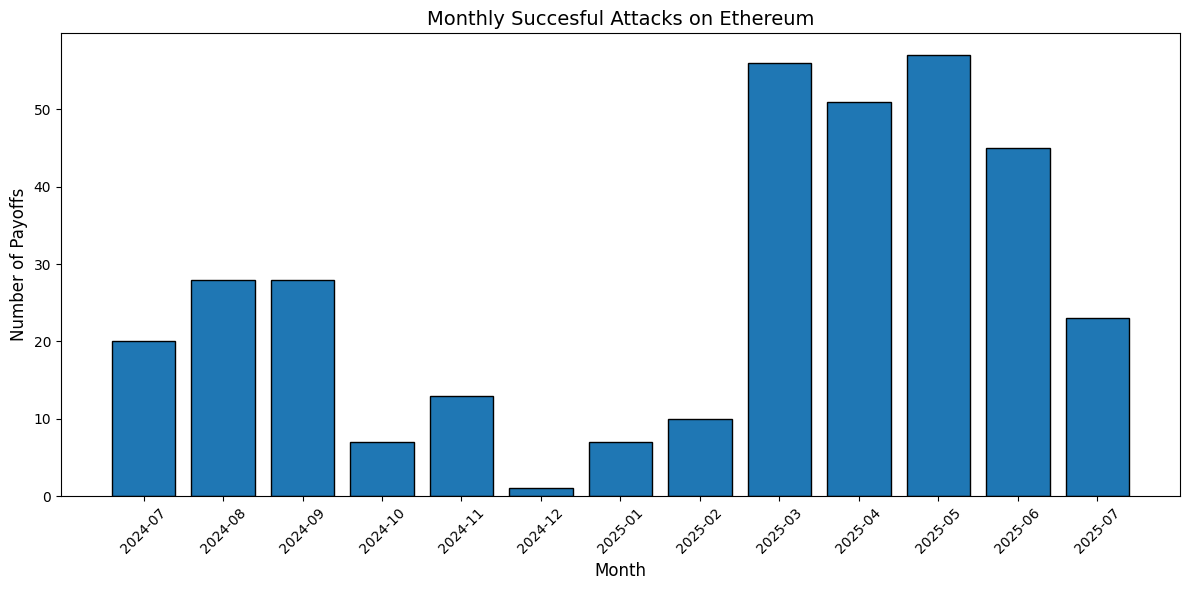

In [26]:
# 1. Configuration
eth_file_path = '/Users/vlad/Downloads/GitHub/ethereum-poisoning-detector/data/eth_confirmed_payouts_2024_07_to_2025_06.csv'

# 2. Load the Data
df = pd.read_csv(eth_file_path)

# 3. Process the Timestamp
# Converts the string timestamp to a datetime object
df['payoff_ts'] = pd.to_datetime(df['payoff_ts'])

# Create a "Month" period column (e.g., "2024-07")
df['month'] = df['payoff_ts'].dt.to_period('M')

# 4. Group by Month and Count
monthly_counts = df.groupby('month').size().reset_index(name='Count')

# Convert Period object to String for cleaner plotting
monthly_counts['month'] = monthly_counts['month'].astype(str)

# Ensure it's sorted chronologically
monthly_counts = monthly_counts.sort_values('month')

# Display the Table
print(monthly_counts)

# 5. Plot the Bar Graph
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts['month'], monthly_counts['Count'], color='#1f77b4', edgecolor='black')

plt.title('Monthly Succesful Attacks on Ethereum', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Payoffs', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
eth_payouts_df = pd.read_csv(eth_file_path)
eth_payouts_df.head()

,payoff_tx_hash,payoff_ts,token_symbol,victim_address,attack_type,attack_tx_hash,attack_attempts,payoff_value_usd,hours_until_payoff,etherscan_link
0,0xfbac8a7f99c188ceb38bd6e5d9b12b2e88b4ad79d066...,2025-05-26 03:38:59.000000 UTC,USDT,0x86c0300fc369e54d22512564cc0e8cc261102604,zero_value,0x4a6046ade9b34e39dd83d3b3e9daff4fb5156d355ba0...,[0x51dc49ff4c283f5b116c7689c3b44df60aa3f77c5df...,1.754893e+06,5,https://etherscan.io/tx/0xfbac8a7f99c188ceb38b...
1,0xf55a4ed3cdb8bdadbe8f23d87cb52231b92357ad95ff...,2025-05-25 23:48:23.000000 UTC,USDT,0x86c0300fc369e54d22512564cc0e8cc261102604,zero_value,0x4a6046ade9b34e39dd83d3b3e9daff4fb5156d355ba0...,[0x51dc49ff4c283f5b116c7689c3b44df60aa3f77c5df...,8.431668e+05,1,https://etherscan.io/tx/0xf55a4ed3cdb8bdadbe8f...
2,0xa80805c97f5008637c4706b03316f61429ca3243f84b...,2025-04-20 03:02:23.000000 UTC,USDT,0xcf03aa88afda357c837b9ddd38a678e3ad7cd5d7,zero_value,0x30714a52580828b27d69a711601c637c1e93b06414ae...,[0x30714a52580828b27d69a711601c637c1e93b06414a...,6.999900e+05,0,https://etherscan.io/tx/0xa80805c97f5008637c47...
3,0x1ae39db5c369689990964a21cd62fba7a67291b1a739...,2025-03-31 14:15:59.000000 UTC,USDT,0x0d534863a71d5e68d5c919a4c2ef47c3a7a792c0,tiny_transfer,0x6354d205f77d9731595463fa0e53df2187184ecdcce3...,[0x6354d205f77d9731595463fa0e53df2187184ecdcce...,5.102944e+05,0,https://etherscan.io/tx/0x1ae39db5c36968999096...
4,0x06b4cad862f7e5873e6f03ff932090129905fe00be90...,2024-11-04 08:56:11.000000 UTC,USDT,0x405a2bdf89b1c9c0626a48486408306815b01d47,zero_value,0xb0581ba324fe0ebbfa6507b29b07f5ede9fd5065547b...,[0xb0581ba324fe0ebbfa6507b29b07f5ede9fd5065547...,1.500000e+05,19,https://etherscan.io/tx/0x06b4cad862f7e5873e6f...


In [36]:
print_statistics(eth_payouts_df)
average_attack_attempts(eth_payouts_df)

Payoff Value USD Statistics:
Max: $1,754,893.46
Min: $10.00
Average: $20,611.46
Median: $1,000.00
Standard Deviation: $115,562.66
Sum: $7,131,565.95

Total number of rows: 346
Number of unique victim addresses: 300
Average number of attack attempts: 6.03
Median number of attack attempts: 2.00


np.float64(6.034682080924855)

      month  Count
0   2024-03      3
1   2024-04      3
2   2024-05      4
3   2024-06      2
4   2024-07      2
5   2024-10      2
6   2024-11      1
7   2024-12      6
8   2025-01      2
9   2025-02      5
10  2025-03      2
11  2025-04      2
12  2025-05      3
13  2025-06      5
14  2025-07      1


/var/folders/1p/z01wly996kqgbn5g072fv5pw0000gn/T/ipykernel_5086/52228690.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['payoff_ts'].dt.to_period('M')


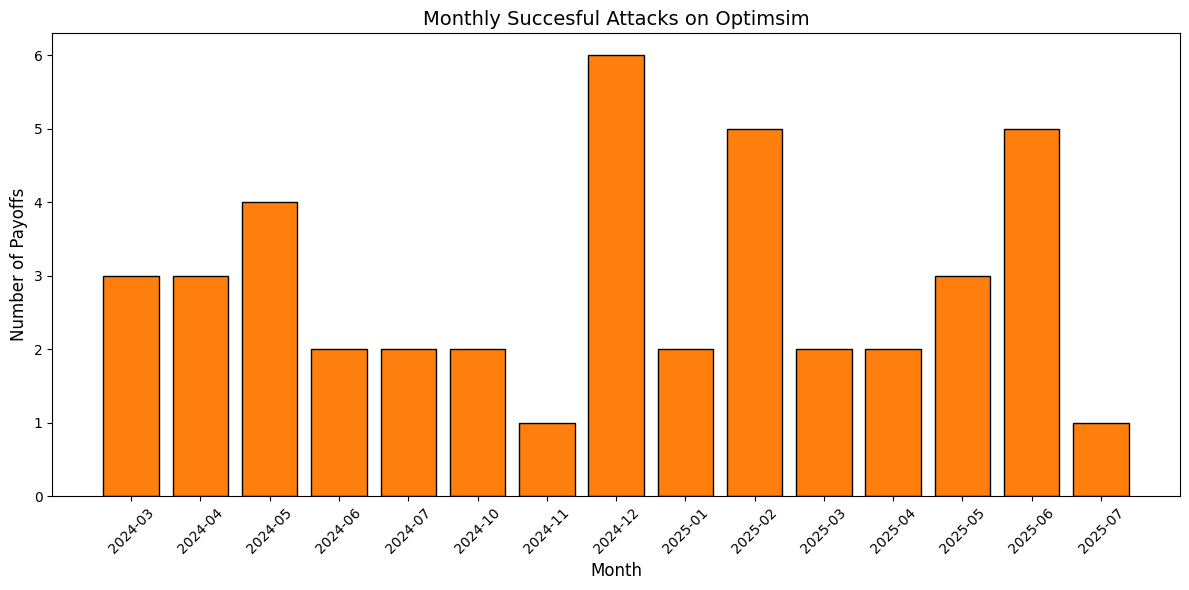

In [23]:
# 1. Configuration
optimism_file_path = '/Users/vlad/Downloads/GitHub/ethereum-poisoning-detector/data/optimism_payouts.csv'

# 2. Load the Data
df = pd.read_csv(optimism_file_path)

# 3. Process the Timestamp
# Converts the string timestamp to a datetime object
df['payoff_ts'] = pd.to_datetime(df['payoff_ts'])

# Create a "Month" period column (e.g., "2024-07")
df['month'] = df['payoff_ts'].dt.to_period('M')

# 4. Group by Month and Count
monthly_counts = df.groupby('month').size().reset_index(name='Count')

# Convert Period object to String for cleaner plotting
monthly_counts['month'] = monthly_counts['month'].astype(str)

# Ensure it's sorted chronologically
monthly_counts = monthly_counts.sort_values('month')

# Display the Table
print(monthly_counts)

# 5. Plot the Bar Graph
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts['month'], monthly_counts['Count'], color='#ff7f0e', edgecolor='black')

plt.title('Monthly Succesful Attacks on Optimsim', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Payoffs', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
opt_payouts_df = pd.read_csv(optimism_file_path)
opt_payouts_df.head()

,payoff_tx_hash,payoff_ts,token_symbol,victim_address,attack_type,attack_tx_hash,attack_attempts,payoff_value_usd,hours_until_payoff,optimism_link
0,0x7808ee6bf41b26348da89405aa0e323dd48f88fcc715...,2024-06-04 21:03:33.000000 UTC,USDC.e,0x72b89a999c7ceb178deb8849aa36ea8ba50288bc,zero_value,0xe42e3afdedbfc745fd06281beb29ffd90b611ce929e8...,[0x324dc9cf29f0f1716e1c0275c63958c67ae58cbd910...,17328.037931,598,https://optimistic.etherscan.io/0x7808ee6bf41b...
1,0xd75b0d1878f797f3fe015a747af0b646d89976b15c95...,2025-05-11 07:34:31.000000 UTC,USDC.e,0x2db9b7df2c8cd4ec43624609d33e18895e6e2201,zero_value,0xa813633b7a73fdb6642b0e7749d97631a69a9ecc36ff...,[0x69dd99f679d64a3b853381302c297d042a81cb0de20...,12000.000000,816,https://optimistic.etherscan.io/0xd75b0d1878f7...
2,0x1928af9c99d962cc4fdbf3692e43cc22681c7c788365...,2025-04-25 12:35:39.000000 UTC,USDC.e,0xea61c800b9c33fc75c72fd20f973c7f43746f24e,zero_value,0xb9e41a4608972052582624337e7ae8dcd9cc86e94a5f...,[0xb9e41a4608972052582624337e7ae8dcd9cc86e94a5...,3574.432348,188,https://optimistic.etherscan.io/0x1928af9c99d9...
3,0x0309de51a85187e7a3ec50a821492bc16055dc6b981c...,2024-05-09 16:19:33.000000 UTC,USDT,0x5af9b775a0100475f180864744fff711127ea3b6,zero_value,0x86b36354502507158e5caa7cb1d2433bcba3fb917ac1...,[0x86b36354502507158e5caa7cb1d2433bcba3fb917ac...,2787.784417,967,https://optimistic.etherscan.io/0x0309de51a851...
4,0xd13d8d1b3ecf9e3adee98881090c73c57e55f8e69c4d...,2024-12-08 16:04:23.000000 UTC,USDT,0x3abf6e4634c4bb9146709883fd69bf3ca7839dbc,zero_value,0xbb12ce59a21bee7feaac97cdadd828d216c56bfd961a...,[0xbb12ce59a21bee7feaac97cdadd828d216c56bfd961...,2750.000000,266,https://optimistic.etherscan.io/0xd13d8d1b3ecf...


In [37]:
print_statistics(opt_payouts_df)
average_attack_attempts(opt_payouts_df)

Payoff Value USD Statistics:
Max: $17,328.04
Min: $11.85
Average: $1,280.98
Median: $281.90
Standard Deviation: $3,168.06
Sum: $55,082.04

Total number of rows: 43
Number of unique victim addresses: 42
Average number of attack attempts: 3.42
Median number of attack attempts: 2.00


np.float64(3.4186046511627906)